# 0.) Import the Credit Card Fraud Data From CCLE

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df['dob'] = pd.to_datetime(df['dob'])
df['year_birth'] = df['dob'].dt.year
df['customer_classification'] = df['year_birth'].copy()
# ya = 0, midd = 1, eld = 2
df.loc[df['customer_classification'] < 1960, 'customer_classification'] = 2
df.loc[(df['customer_classification'] <= 1985) & (df['customer_classification']>= 1960), 'customer_classification'] = 1
df.loc[(df['customer_classification'] <= 2005) & (df['customer_classification']>= 1986), 'customer_classification'] = 0
df.loc[df['customer_classification'] == 2, 'customer_classification'] = 'elderly'
df.loc[df['customer_classification'] == 1, 'customer_classification'] = 'middle_aged'
df.loc[df['customer_classification'] == 0, 'customer_classification'] = 'young_adult'

In [6]:
df_select = df[["trans_date_trans_time", "customer_classification", "amt", "city_pop", "is_fraud"]]
df_select.columns

Index(['trans_date_trans_time', 'customer_classification', 'amt', 'city_pop',
       'is_fraud'],
      dtype='object')

In [7]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.hour for i in df_select["trans_date_trans_time"]]

<ipython-input-7-2b0517f78e66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-7-2b0517f78e66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.hour for i in df_select["trans_date_trans_time"]]


In [8]:
X = pd.get_dummies(df_select, ["customer_classification"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

In [9]:
X.head()

,amt,city_pop,time_var,customer_classification_elderly,customer_classification_middle_aged,customer_classification_young_adult
0,2.86,333497,12,0,1,0
1,29.84,302,12,0,0,1
2,41.28,34496,12,0,1,0
3,60.05,54767,12,0,0,1
4,3.19,1126,12,1,0,0


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = .3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [11]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [12]:
ros = RandomOverSampler(random_state=0)
over_X, over_y = ros.fit_resample(X,y)

In [13]:
rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X,y)

In [14]:
oversample = SMOTE()
smote_x, smote_y = oversample.fit_resample(X,y)

In [ ]:
'''import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
ros = RandomOverSampler(random_state=0)
over_X, over_y = ros.fit_resample(X,y)
rus = RandomUnderSampler(random_state=0)
under_X, under_y = rus.fit_resample(X,y)
oversample = SMOTE()
smote_x, smote_y = oversample.fit_resample(X,y)'''

# 3.) Train three logistic regression models 

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf_over = LogisticRegression()
over_log = clf_over.fit(over_X, over_y)

In [17]:
clf_under = LogisticRegression()
under_log = clf_under.fit(under_X, under_y)

In [18]:
clf_smote = LogisticRegression()
smote_log = clf_smote.fit(smote_x, smote_y)

# 4.) Test the three models

In [19]:
over_y_pred = over_log.predict(X_test)

In [20]:
under_y_pred = under_log.predict(X_test)

In [21]:
smote_y_pred = smote_log.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

SMOTE outperformed the other models based on accuracy, precision, and F1-score. Based on these three out of sample metrics, I believe that SMOTE performed the best.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
over_acc = accuracy_score(y_test, over_y_pred)
over_prec = precision_score(y_test, over_y_pred)
over_rec = recall_score(y_test, over_y_pred)
over_f1 = f1_score(y_test, over_y_pred)
print('Over:\n')
print("Accuracy: ", over_acc)
print("Precision: ", over_prec)
print("Recall: ", over_rec)
print("F1-score: ", over_f1)

Over:

Accuracy:  0.810300151155258
Precision:  0.015387983611171926
Recall:  0.7723704866562009
F1-score:  0.03017479300827967


In [27]:
under_acc = accuracy_score(y_test, under_y_pred)
under_prec = precision_score(y_test, under_y_pred)
under_rec = recall_score(y_test, under_y_pred)
under_f1 = f1_score(y_test, under_y_pred)
print('Under:\n')
print("Accuracy: ", under_acc)
print("Precision: ", under_prec)
print("Recall: ", under_rec)
print("F1-score: ", under_f1)


Under:

Accuracy:  0.8127294320881019
Precision:  0.015493314745580128
Recall:  0.7676609105180534
F1-score:  0.03037361408739402


In [28]:
smote_acc = accuracy_score(y_test, smote_y_pred)
smote_prec = precision_score(y_test, smote_y_pred)
smote_rec = recall_score(y_test, smote_y_pred)
smote_f1 = f1_score(y_test, smote_y_pred)
print('SMOTE:\n')
print("Accuracy: ", smote_acc)
print("Precision: ", smote_prec)
print("Recall: ", smote_rec)
print("F1-score: ", smote_f1)

SMOTE:

Accuracy:  0.8211089517502819
Precision:  0.01608250157509036
Recall:  0.7613814756671899
F1-score:  0.031499642787556015


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [29]:
import matplotlib.pyplot as plt

In [30]:
OG_data_temp = pd.concat([X_train, y_train], axis=1)

Before SMOTE

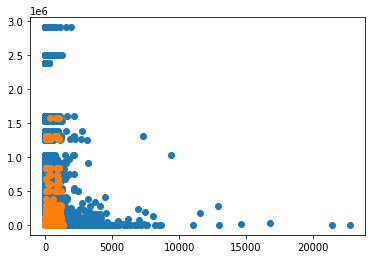

In [36]:
# Orange
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 0]['amt'],OG_data_temp[OG_data_temp['is_fraud'] == 0]['city_pop'] )
# Blue
plt.scatter(OG_data_temp[OG_data_temp['is_fraud'] == 1]['amt'],OG_data_temp[OG_data_temp['is_fraud'] == 1]['city_pop'] )
plt.show()

After SMOTE

In [32]:
smote_y_df = pd.DataFrame(smote_y)

In [33]:
new_data_temp = pd.concat([smote_x, smote_y_df], axis=1)

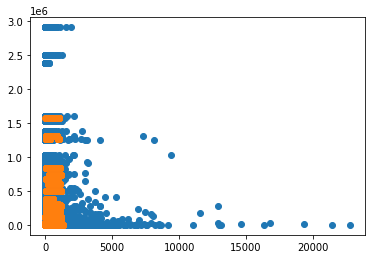

In [37]:
# Orange
plt.scatter(new_data_temp[new_data_temp['is_fraud'] == 0]['amt'],new_data_temp[new_data_temp['is_fraud'] == 0]['city_pop'] )
# Blue
plt.scatter(new_data_temp[new_data_temp['is_fraud'] == 1]['amt'],new_data_temp[new_data_temp['is_fraud'] == 1]['city_pop'] )
plt.show()